In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Para importar el csv

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data.csv', names=['x1-t1', 'y1-t1','z1-t1','x2-t1', 'y2-t1','z2-t1','x1_rotacion-t1','y1_rotacion-t1','z1_rotacion-t1','x2_rotacion-t1','y2_rotacion-t1','z2_rotacion-t1','x1-t2', 'y1-t2','z1-t2','x2-t2', 'y2-t2','z2-t2','x1_rotacion-t2','y1_rotacion-t2','z1_rotacion-t2','x2_rotacion-t2','y2_rotacion-t2','z2_rotacion-t2', 'x1-t3', 'y1-t3','z1-t3','x2-t3', 'y2-t3','z2-t3','x1_rotacion-t3','y1_rotacion-t3','z1_rotacion-t3','x2_rotacion-t3','y2_rotacion-t3','z2_rotacion-t3', 'x1-t4', 'y1-t4','z1-t4','x2-t4', 'y2-t4','z2-t4','x1_rotacion-t4','y1_rotacion-t4','z1_rotacion-t4','x2_rotacion-t4','y2_rotacion-t4','z2_rotacion-t4', 'x1-t5', 'y1-t5','z1-t5','x2-t5', 'y2-t5','z2-t5','x1_rotacion-t5','y1_rotacion-t5','z1_rotacion-t5','x2_rotacion-t5','y2_rotacion-t5','z2_rotacion-t5', 'x1-t6', 'y1-t6','z1-t6','x2-t6', 'y2-t6','z2-t6','x1_rotacion-t6','y1_rotacion-t6','z1_rotacion-t6','x2_rotacion-t6','y2_rotacion-t6','z2_rotacion-t6', 'x1-t7', 'y1-t7','z1-t7','x2-t7', 'y2-t7','z2-t7','x1_rotacion-t7','y1_rotacion-t7','z1_rotacion-t7','x2_rotacion-t7','y2_rotacion-t7','z2_rotacion-t7', 'x1-t8', 'y1-t8','z1-t8','x2-t8', 'y2-t8','z2-t8','x1_rotacion-t8','y1_rotacion-t8','z1_rotacion-t8','x2_rotacion-t8','y2_rotacion-t8','z2_rotacion-t8', 'direccion','porcentaje'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,x1-t1,y1-t1,z1-t1,x2-t1,y2-t1,z2-t1,x1_rotacion-t1,y1_rotacion-t1,z1_rotacion-t1,x2_rotacion-t1,...,y2-t8,z2-t8,x1_rotacion-t8,y1_rotacion-t8,z1_rotacion-t8,x2_rotacion-t8,y2_rotacion-t8,z2_rotacion-t8,direccion,porcentaje
0,0.318429,-0.126893,3.979163,-0.837971,1.922544,9.732430,4.572977,-1.820686,85.076471,-4.828231,...,0.703895,10.412383,0.490598,-1.700969,88.229655,-2.915554,3.862397,85.158058,0,0.000000
1,0.246603,-3.969586,1.450886,-1.312023,-1.738190,9.955091,3.339297,-69.658119,20.041836,-7.397332,...,-1.831564,9.852140,3.522277,-63.246234,26.483819,-6.488134,-10.463146,77.649702,0,74.407334
2,0.421379,-0.371101,4.027047,-1.067814,-2.600103,9.974244,5.948517,-5.236632,82.062367,-5.914463,...,-1.259350,9.859322,2.081684,-6.027153,83.620961,0.966004,-7.278043,82.657440,0,0.000000
3,-0.359130,2.140416,3.201048,-0.694318,-1.513135,10.041282,-5.328164,33.603732,55.862420,-3.911479,...,-1.470040,10.062830,-7.323286,49.417538,39.637748,-5.352969,-8.274826,80.124219,0,-58.138280
4,0.258574,-0.545878,4.103662,-0.569820,-1.798045,10.101137,3.574069,-7.562302,81.626695,-3.178853,...,-1.774103,9.895235,5.720142,-5.521128,82.037132,-4.154557,-10.137498,79.027503,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.155623,-3.579331,2.152387,7.551312,-1.611298,7.589619,2.133870,-58.913908,30.996195,44.223645,...,-1.424550,7.577648,4.397899,-58.339735,31.281944,41.667158,-7.933128,47.236186,-1,68.634983
1019,-0.031125,-0.090980,4.891354,-1.053449,0.004788,10.074801,-0.364516,-1.065563,88.873800,-5.969311,...,-0.045490,9.988609,3.258142,1.395732,86.454895,-0.439456,-0.260925,89.488917,0,0.000000
1020,0.203507,2.449268,3.191471,8.789114,-2.267309,7.929596,2.895902,37.448011,52.400620,46.821324,...,-1.209072,6.150704,1.147415,59.267838,30.706003,52.393840,-6.759566,36.781947,-1,-69.726869
1021,-0.045490,2.980781,2.806004,6.880936,-0.639252,7.577648,-0.636647,46.726206,43.266707,42.140145,...,0.071826,10.323798,10.371155,11.403734,74.490440,3.860721,0.397715,86.118786,0,0.000000


In [ ]:
# pasamos a números la variable objetivo con el LabelEncoder:
label_encoder = LabelEncoder()
df['direccion'] = label_encoder.fit_transform(df['direccion'])

In [ ]:
X = df[['x1-t1', 'y1-t1','z1-t1','x2-t1', 'y2-t1','z2-t1','x1_rotacion-t1','y1_rotacion-t1','z1_rotacion-t1','x2_rotacion-t1','y2_rotacion-t1','z2_rotacion-t1','x1-t2', 'y1-t2','z1-t2','x2-t2', 'y2-t2','z2-t2','x1_rotacion-t2','y1_rotacion-t2','z1_rotacion-t2','x2_rotacion-t2','y2_rotacion-t2','z2_rotacion-t2', 'x1-t3', 'y1-t3','z1-t3','x2-t3', 'y2-t3','z2-t3','x1_rotacion-t3','y1_rotacion-t3','z1_rotacion-t3','x2_rotacion-t3','y2_rotacion-t3','z2_rotacion-t3', 'x1-t4', 'y1-t4','z1-t4','x2-t4', 'y2-t4','z2-t4','x1_rotacion-t4','y1_rotacion-t4','z1_rotacion-t4','x2_rotacion-t4','y2_rotacion-t4','z2_rotacion-t4', 'x1-t5', 'y1-t5','z1-t5','x2-t5', 'y2-t5','z2-t5','x1_rotacion-t5','y1_rotacion-t5','z1_rotacion-t5','x2_rotacion-t5','y2_rotacion-t5','z2_rotacion-t5', 'x1-t6', 'y1-t6','z1-t6','x2-t6', 'y2-t6','z2-t6','x1_rotacion-t6','y1_rotacion-t6','z1_rotacion-t6','x2_rotacion-t6','y2_rotacion-t6','z2_rotacion-t6', 'x1-t7', 'y1-t7','z1-t7','x2-t7', 'y2-t7','z2-t7','x1_rotacion-t7','y1_rotacion-t7','z1_rotacion-t7','x2_rotacion-t7','y2_rotacion-t7','z2_rotacion-t7', 'x1-t8', 'y1-t8','z1-t8','x2-t8', 'y2-t8','z2-t8','x1_rotacion-t8','y1_rotacion-t8','z1_rotacion-t8','x2_rotacion-t8','y2_rotacion-t8','z2_rotacion-t8']].values


y_direccion = df['direccion'].values
y_porcentaje = df['porcentaje'].values

In [ ]:
X_train, X_test, y_train_direccion, y_test_direccion, y_train_porcentaje, y_test_porcentaje = train_test_split(X, y_direccion, y_porcentaje, test_size=0.2, random_state=42)

In [ ]:
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
dense_layer = tf.keras.layers.Dense(8, activation='relu')(input_layer)

#capa de regularización L2
dense_layer = tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)

#capa dropout
#dense_layer = tf.keras.layers.Dropout(0.1)(dense_layer)

# Output 1: Classification for 'direccion'
output_direccion = tf.keras.layers.Dense(3, activation='softmax', name='direccion_output')(dense_layer)

# Output 2: Regression for 'porcentaje'
output_porcentaje = tf.keras.layers.Dense(1, activation='linear', name='porcentaje_output')(dense_layer)

# Combine into a model
model = tf.keras.Model(inputs=input_layer, outputs=[output_direccion, output_porcentaje])


model.compile(
    optimizer='adam',
    loss={
        'direccion_output': tf.keras.losses.SparseCategoricalCrossentropy(),
        'porcentaje_output': tf.keras.losses.MeanSquaredError()
    },
    metrics={
        'direccion_output': 'accuracy',
        'porcentaje_output': 'mae'
    }
)


In [ ]:
history = model.fit(
    X_train,
    {'direccion_output': y_train_direccion, 'porcentaje_output': y_train_porcentaje},
    epochs=100,
    batch_size=2,
    validation_data=(X_test, {'direccion_output': y_test_direccion, 'porcentaje_output': y_test_porcentaje})
)

Epoch 1/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - direccion_output_accuracy: 0.2344 - direccion_output_loss: 38.1442 - loss: 1455.5267 - porcentaje_output_loss: 1417.2393 - porcentaje_output_mae: 24.0296 - val_direccion_output_accuracy: 0.7854 - val_direccion_output_loss: 3.1127 - val_loss: 166.0543 - val_porcentaje_output_loss: 161.9921 - val_porcentaje_output_mae: 7.2896
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - direccion_output_accuracy: 0.8148 - direccion_output_loss: 2.1129 - loss: 79.1632 - porcentaje_output_loss: 76.9050 - porcentaje_output_mae: 5.9156 - val_direccion_output_accuracy: 0.8634 - val_direccion_output_loss: 0.5231 - val_loss: 119.5371 - val_porcentaje_output_loss: 118.2900 - val_porcentaje_output_mae: 6.1893
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - direccion_output_accuracy: 0.9142 - direccion_output_loss: 0.3022 - loss: 91.4864 - porcentaje_output_loss: 91.0391 - porcentaje_output_mae: 5.9198 - val_direccion_output_accuracy: 0.9463 -

In [ ]:
eval_results = model.evaluate(X_test, {'direccion_output': y_test_direccion, 'porcentaje_output': y_test_porcentaje})

print("Test Loss (Total):", eval_results[0])
print("Test Accuracy (direccion):", eval_results[1])
print("Test Regression Loss (porcentaje):", eval_results[2])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - direccion_output_accuracy: 0.9748 - direccion_output_loss: 0.8639 - loss: 3.2199 - porcentaje_output_loss: 2.1265 - porcentaje_output_mae: 0.9247 
Test Loss (Total): 3.0428695678710938
Test Accuracy (direccion): 0.36850863695144653
Test Regression Loss (porcentaje): 2.2938549518585205


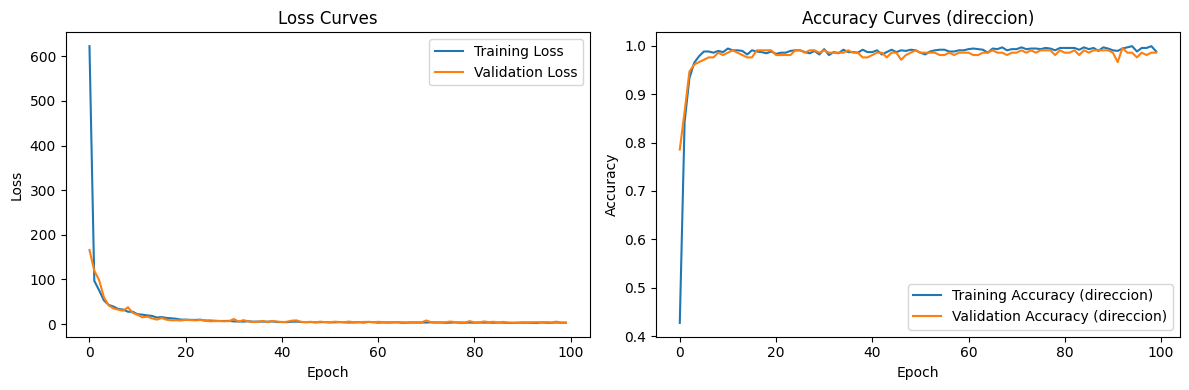

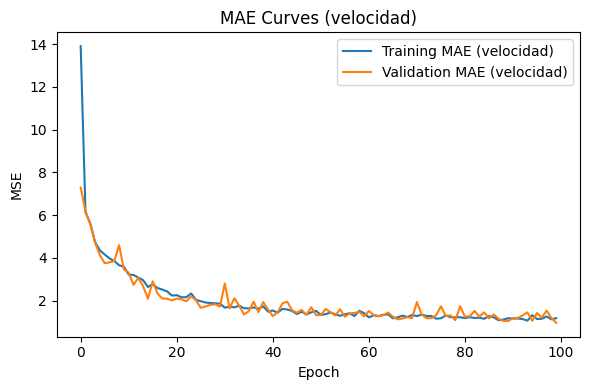

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['direccion_output_accuracy']
val_acc = history.history['val_direccion_output_accuracy']

train_mse = history.history['porcentaje_output_mae']
val_mse = history.history['val_porcentaje_output_mae']

# Plotting the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy (direccion)')
plt.plot(val_acc, label='Validation Accuracy (direccion)')
plt.title('Accuracy Curves (direccion)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the MSE curves
plt.figure(figsize=(6, 4))
plt.plot(train_mse, label='Training MAE (velocidad)')
plt.plot(val_mse, label='Validation MAE (velocidad)')
plt.title('MAE Curves (velocidad)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf

# Guardar el modelo en formato nativo de Keras
model.save('model.keras')

# Cargar el modelo y convertirlo a TensorFlow Lite
model = tf.keras.models.load_model('model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo optimizado
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpqxbkfzr4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96), dtype=tf.float32, name='input_layer')
Output Type:
  List[TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  133826719717840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133826719725136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133826719725520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133826719721872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133826719721680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133826719720912: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
from google.colab import files
!zip -r modelo.zip /tmp/tmpkvid4tww
files.download("modelo.zip")


	zip warning: name not matched: /tmp/tmpkvid4tww

zip error: Nothing to do! (try: zip -r modelo.zip . -i /tmp/tmpkvid4tww)


FileNotFoundError: Cannot find file: modelo.zip